# Deep Learning with Image Processing and Computer Vision

## Import Libraries

In [41]:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow version: {tf.__version__}")
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings("ignore")

Tensorflow version: 2.7.0


## Configurations

In [37]:
class CONFIG:
    
    img_size = 299
    seed = 42
    learning_rate = 0.01
    batch_size = 32
    epochs = 10
    num_classes = 3
    model = "Xception"
    model_version = 1
    model_name = f"{model}_{model_version}"
    workdir = "workdir"

## Dataset

For the dataset, The `beans` dataset from Tensorflow dataset will be use in this project.

Follow this [link](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=beans) to know more about the `beans` dataset.

In [3]:
def check_instance(ds):
    assert isinstance(ds, tf.data.Dataset)
    print(ds)

In [4]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#     batch_size=CONFIG.batch_size,
    with_info=True,
    as_supervised=True,
    data_dir="../dataset",
)
check_instance(train_ds)
check_instance(val_ds)
check_instance(test_ds)

2022-12-17 05:06:10.285367: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling ../dataset/beans/0.1.0.incompleteOXKWGZ/beans-train.tfrecord*...:   0%|          | 0/1034 [00:00<?, …

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling ../dataset/beans/0.1.0.incompleteOXKWGZ/beans-validation.tfrecord*...:   0%|          | 0/133 [00:00…

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling ../dataset/beans/0.1.0.incompleteOXKWGZ/beans-test.tfrecord*...:   0%|          | 0/128 [00:00<?, ? …

Dataset beans downloaded and prepared to ../dataset/beans/0.1.0. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>


2022-12-17 05:06:16.481667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-17 05:06:16.481701: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-17 05:06:16.481723: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-21-87): /proc/driver/nvidia/version does not exist
2022-12-17 05:06:16.482008: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
metadata

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
    by experts from the National Crops Resources Research Institute (NaCRRI) in
    Uganda and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='/tmp/tmpk7qh03xetfds',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <SplitInfo num_e

## EDA image dataset

In [6]:
num_classes = metadata.features['label'].num_classes
print(f"This beans dataset has : {num_classes} classes")

This beans dataset has : 3 classes


In [7]:
images = list()
labels = list()
get_label_name = metadata.features['label'].int2str

for img, label in iter(train_ds):
    images.append(img)
    labels.append(label)

In [8]:
w, h, c = images[0].shape

In [9]:
print(f"Image width: {w}\nImage height: {h}\nImage channel: {c}")

Image width: 500
Image height: 500
Image channel: 3


### inspect more for firsrt fifth teen images

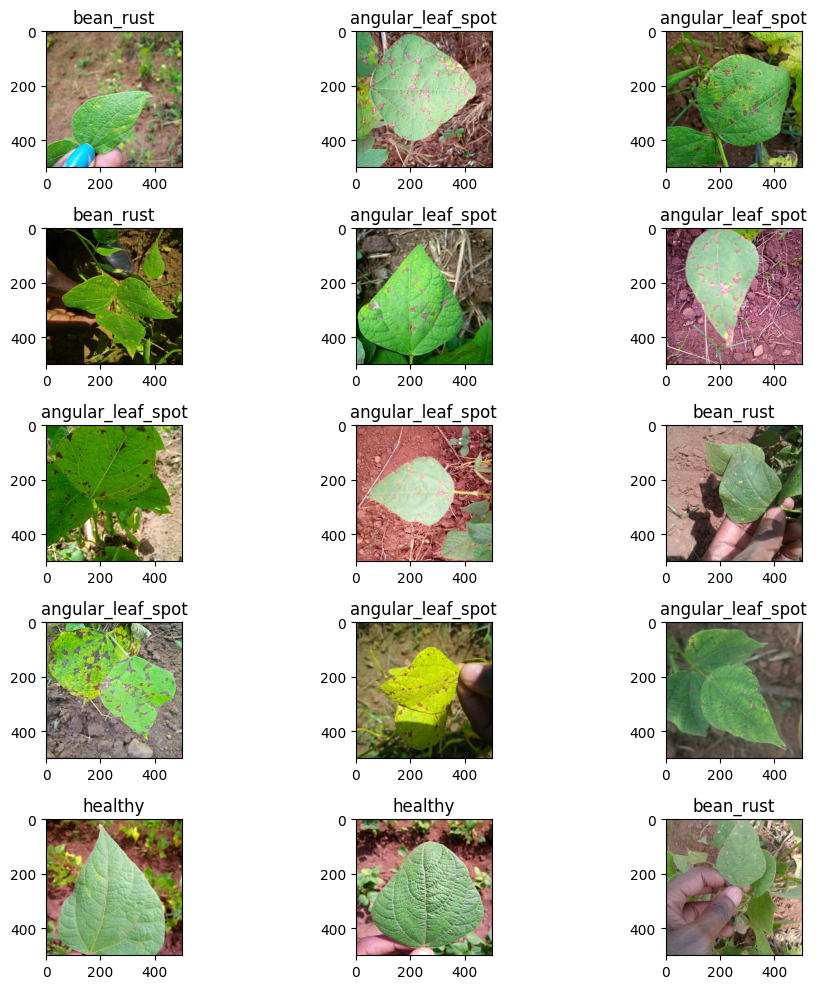

In [10]:
fig = plt.figure(figsize=(10, 10))
cols = 3
rows = 5
for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        fig.tight_layout()
        _ = plt.imshow(images[i])
        _ = plt.title(get_label_name(labels[i]))
plt.show()

### Plot the images as DataFrame with first 30 images

,image,label
0,,1 (bean_rust)
1,,1 (bean_rust)
2,,0 (angular_leaf_spot)
3,,0 (angular_leaf_spot)
4,,1 (bean_rust)
5,,0 (angular_leaf_spot)
6,,0 (angular_leaf_spot)
7,,0 (angular_leaf_spot)
8,,0 (angular_leaf_spot)
9,,1 (bean_rust)

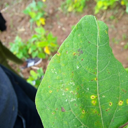
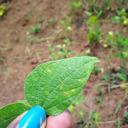
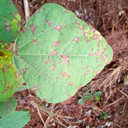
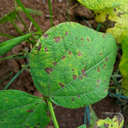
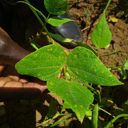
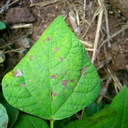
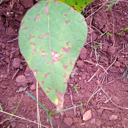
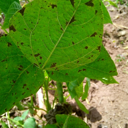
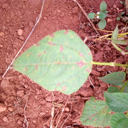
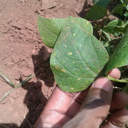
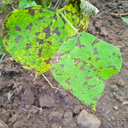
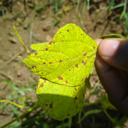
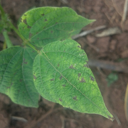
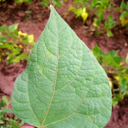
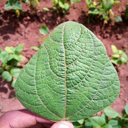
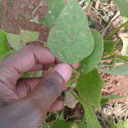
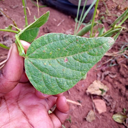
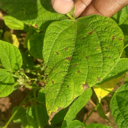
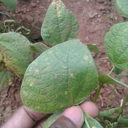
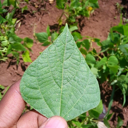
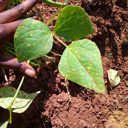
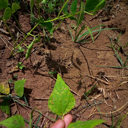
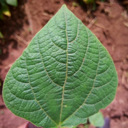
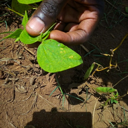
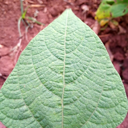
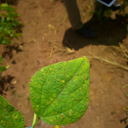
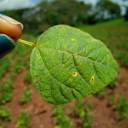
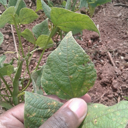
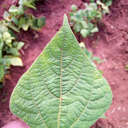
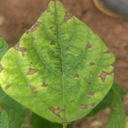

In [11]:
df = tfds.as_dataframe(train_ds.take(30), metadata)
df

## Preprocessing images

In [12]:
resize_and_rescale = keras.Sequential([
  keras.layers.Resizing(CONFIG.img_size, CONFIG.img_size),
  keras.layers.Rescaling(1. / 255)
])

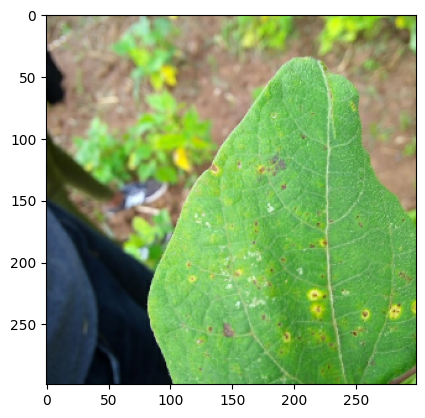

In [13]:
img_after = resize_and_rescale(images[0])
_ = plt.imshow(img_after)

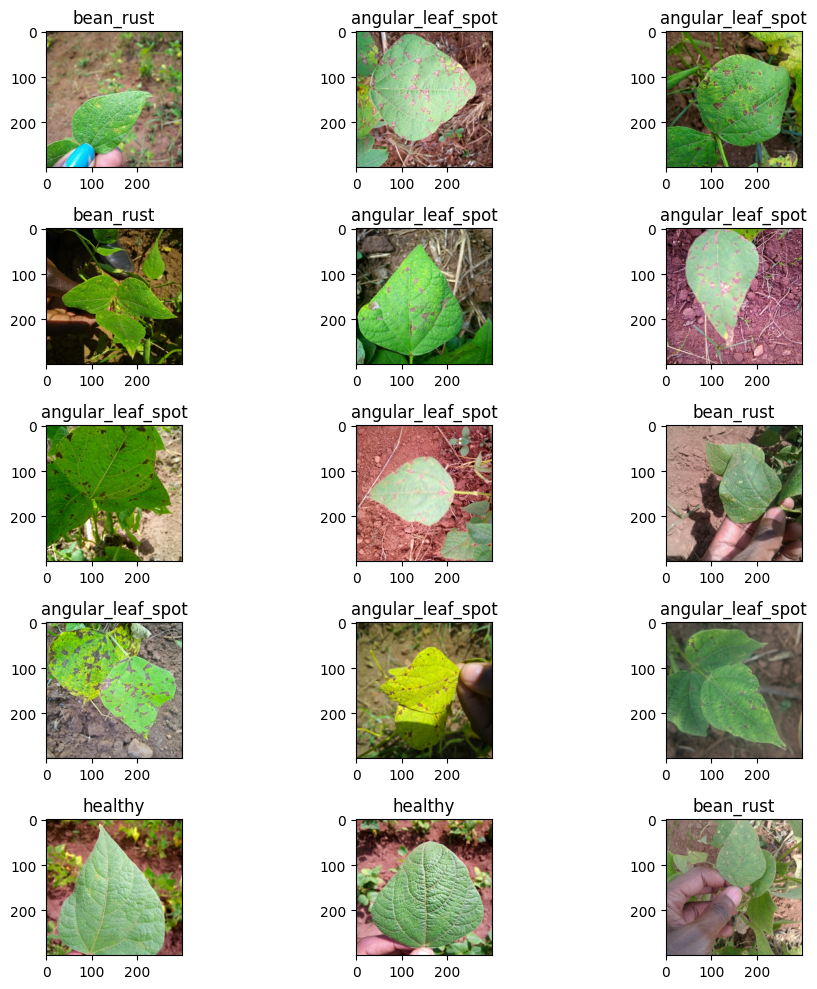

In [14]:
fig = plt.figure(figsize=(10, 10))
cols = 3
rows = 5
for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        fig.tight_layout()
        img_after = resize_and_rescale(images[i])
        _ = plt.imshow(img_after)
        _ = plt.title(get_label_name(labels[i]))
plt.show()

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(CONFIG.seed)

    # Batch all datasets
    ds = ds.batch(CONFIG.batch_size)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

## Model Training - Base model

In [16]:
from tensorflow.keras.applications.xception import Xception

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)
)

base_model.trainable = False


inputs = keras.Input(shape=(299, 299, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vectors)

model = keras.Model(inputs, outputs)

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=CONFIG.learning_rate)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [18]:
train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [19]:
history = model.fit(train_ds, validation_data=val_ds, epochs=CONFIG.epochs)

Epoch 1/10
26/26 [==============================] - 110s 4s/step - loss: 0.7414 - accuracy: 0.6892 - val_loss: 0.3394 - val_accuracy: 0.8846
Epoch 2/10
26/26 [==============================] - 105s 4s/step - loss: 0.3105 - accuracy: 0.8803 - val_loss: 0.2731 - val_accuracy: 0.9038
Epoch 3/10
26/26 [==============================] - 104s 4s/step - loss: 0.2356 - accuracy: 0.9250 - val_loss: 0.2377 - val_accuracy: 0.9231
Epoch 4/10
26/26 [==============================] - 104s 4s/step - loss: 0.1909 - accuracy: 0.9407 - val_loss: 0.2213 - val_accuracy: 0.9231
Epoch 5/10
26/26 [==============================] - 103s 4s/step - loss: 0.1585 - accuracy: 0.9492 - val_loss: 0.2155 - val_accuracy: 0.9135
Epoch 6/10
26/26 [==============================] - 103s 4s/step - loss: 0.1347 - accuracy: 0.9722 - val_loss: 0.2134 - val_accuracy: 0.9135
Epoch 7/10
26/26 [==============================] - 103s 4s/step - loss: 0.1233 - accuracy: 0.9686 - val_loss: 0.2257 - val_accuracy: 0.9038
Epoch 8/10
26

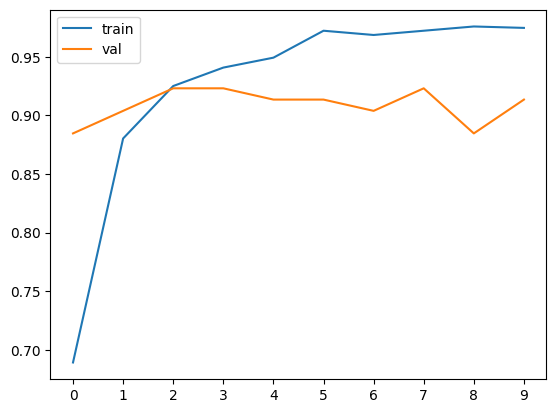

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Hyper-parameter tuning

### Learning rate

In [28]:
def generate_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(CONFIG.img_size, CONFIG.img_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(CONFIG.img_size, CONFIG.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    
    print(f"Learning rate: {lr}")

    model = generate_model(learning_rate=lr)
    history = model.fit(train_ds, validation_data=val_ds, epochs=CONFIG.epochs)
    scores[lr] = history.history
    print()

Learning rate: 0.0001
Epoch 1/10
26/26 [==============================] - 104s 4s/step - loss: 1.8800 - accuracy: 0.2696 - val_loss: 1.5839 - val_accuracy: 0.2981
Epoch 2/10
26/26 [==============================] - 102s 4s/step - loss: 1.4642 - accuracy: 0.3216 - val_loss: 1.3189 - val_accuracy: 0.3269
Epoch 3/10
26/26 [==============================] - 102s 4s/step - loss: 1.2700 - accuracy: 0.3628 - val_loss: 1.1858 - val_accuracy: 0.4615
Epoch 4/10
26/26 [==============================] - 104s 4s/step - loss: 1.1581 - accuracy: 0.5030 - val_loss: 1.0978 - val_accuracy: 0.6154
Epoch 5/10
26/26 [==============================] - 102s 4s/step - loss: 1.0781 - accuracy: 0.6518 - val_loss: 1.0305 - val_accuracy: 0.6538
Epoch 6/10
26/26 [==============================] - 104s 4s/step - loss: 1.0140 - accuracy: 0.7025 - val_loss: 0.9748 - val_accuracy: 0.6827
Epoch 7/10
26/26 [==============================] - 102s 4s/step - loss: 0.9606 - accuracy: 0.7255 - val_loss: 0.9280 - val_accuracy

#### Train accuracy with learning rates

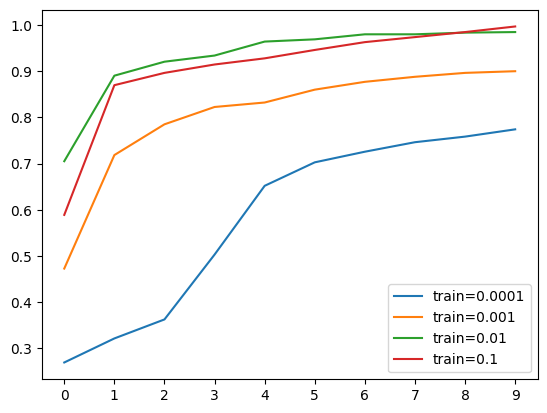

In [31]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

#### Validation accuracy with learning rates

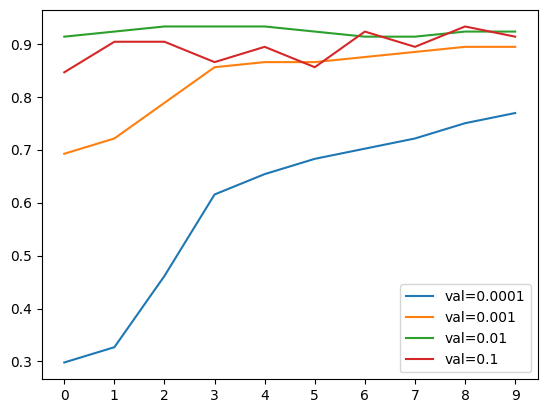

In [32]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## Adjusting configurations

In [38]:
config = CONFIG()
config.learning_rate = 0.01 # After fine tuned

## Checkpoint

In [52]:
# Checkpoint settings
def checkpoint_setup(file_name):
    filename = "{filename}_epoch:02d_val_accuracy:.3f.h5".format(file_name)
    checkpoint_filepath = os.path.join(config.workdir, 'ckpt', filename)
    checkpoint = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )

In [54]:
model = generate_model(learning_rate=config.learning_rate)

file_name = xception_v1
checkpoint = checkpoint_setup(file_name)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

NameError: name 'xception_v1' is not defined

## Adding more layers

In [ ]:
def generate_model_add_inner(learning_rate, size_inner):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3)
    )

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(config.num_classes)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
scores = {}

for size in [10, 100, 1000]:
    
    print(f"Dense inner size: {size}")

    model = generate_model_add_inner(learning_rate=config.learning_rate, size_inner=size)
    history = model.fit(train_ds, validation_data=val_ds, epochs=config.epochs)
    scores[size] = history.history

    print()

In [ ]:
# Adjust configurations
config.size_inner = 

## Add Regularization and dropout

In [ ]:
def generate_model_add_inner_dropout(learning_rate, size_inner, droprate):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3)
    )

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(config.num_classes)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
for droprate in [0.0, 0.2, 0.5]:
    print(f"Dropout rate : {droprate}")

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()